In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import random
import copy

import sys
sys.path.append("Fall 2024")

import kmax as kx
import utility as util
from hierarchy import *
import z_solver as zs
import discretize as disc

# Z PDF testing

$$\mathbb{P}(Z\le x\mid x\ge0) = e^{-x} \frac{A}{\lambda}$$

$$\mathbb{P}(Z\le x\mid x<0)=\frac{-\left(e^{-Ae^{x}-x}\right)\left(2-2e^{(Ae^{x})}+2Ae^{x}+A^{2}e^{(2x)}\right)}{A}$$

0.9933057053003354
0.9933778921979364
0.9934970946638025
0.9936423878992225
0.9937995049954857


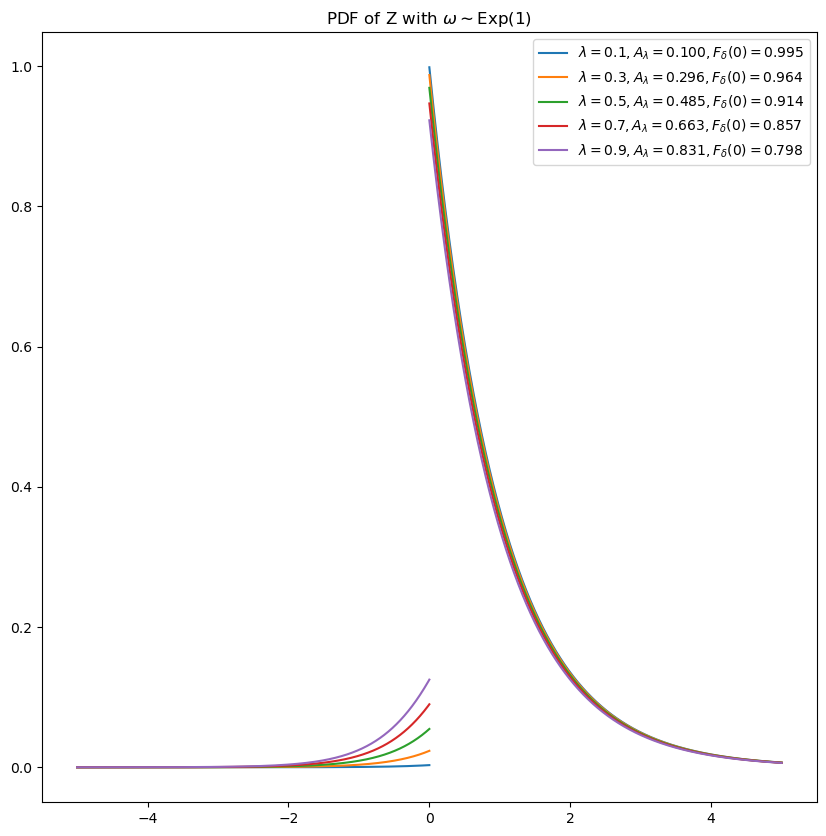

In [6]:
import scipy.integrate

plt.title('PDF of Z with $\\omega\\sim\\text{Exp}(1)$')
plt.rcParams["figure.figsize"] = (8,8)
num_samples = 100000
for lam in [0.1,0.3,0.5,0.7,0.9]:
    _xs, _pdf_values, A_lam = zs.compute_z_pdf_exp(lam, num_samples = 100000, high=5)
    # insert NaN values at x=0 to prevent drawing of discontinuity
    xs = np.insert(_xs, num_samples//2, np.nan)
    pdf_values = np.insert(_pdf_values, num_samples//2, np.nan)
    plt.plot(xs, pdf_values, label=f'$\\lambda={lam}, A_\\lambda = {A_lam:.3f}, F_\\delta(0)={(1+A_lam) * math.exp(-A_lam):.3f}$')
    print(scipy.integrate.simpson(_pdf_values, x=_xs))
plt.legend()